In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), 
r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)
# définition des paramètres kwargs typo
text_kwargs = dict(ha='center', va='center', fontsize=10, color='white')
# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark',
font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
# set dark background
plt.style.use("dark_background")
# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('olist_master.csv')

In [32]:
df.describe()

,customer_zip_code_prefix,review_score,price,freight_value,seller_zip_code_prefix,payment_installments,payment_value,day_of_week,month,trimester,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase,review_time_response,mean_satisfaction_score,cluster
count,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000,102331.000000
mean,35092.930451,4.124762,123.418797,20.114023,24655.469105,2.909324,157.076211,2.759565,6.041962,2.359041,2017.541507,12.011131,123.418797,0.151352,190.954881,1.016681,272.350500,13.011121,4.124762,1.533914
std,29796.573959,1.310700,185.060447,15.787244,27699.065095,2.731772,209.709180,1.966455,3.221965,1.058355,0.504107,9.462850,62.089043,0.449153,347.056542,0.131686,153.204854,9.462856,1.308551,1.298787
min,1003.000000,1.000000,0.850000,0.000000,1001.000000,0.000000,0.010000,0.000000,1.000000,1.000000,2016.000000,0.000000,28.452917,0.000000,6.150000,1.000000,32.000000,1.000000,1.000000,0.000000
25%,11340.000000,4.000000,40.000000,13.160000,6429.000000,1.000000,58.275000,1.000000,3.000000,1.000000,2017.000000,6.000000,93.602427,0.000000,63.270000,1.000000,148.000000,7.000000,4.000000,0.000000
50%,24360.000000,5.000000,78.000000,16.360000,13720.000000,2.000000,102.660000,3.000000,6.000000,2.000000,2018.000000,10.000000,117.069382,0.000000,110.460000,1.000000,254.000000,11.000000,5.000000,1.000000
75%,58622.500000,5.000000,138.500000,21.240000,29156.000000,4.000000,176.655000,4.000000,8.000000,3.000000,2018.000000,15.000000,134.202466,0.000000,195.035000,1.000000,383.000000,16.000000,5.000000,3.000000
max,99980.000000,5.000000,6499.000000,409.680000,99730.000000,24.000000,6726.660000,6.000000,12.000000,4.000000,2018.000000,208.000000,1117.622000,8.000000,15978.650000,3.000000,727.000000,209.000000,5.000000,5.000000


In [7]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,review_score,product_id,seller_id,...,trimester,year,delivery_time_days,average_price_cat,nb_purchase_last_3_months,total_amount_client,nb_different_product_client,days_since_last_purchase,review_time_response,mean_satisfaction_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,-0.694175,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,4.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,...,2,2017,-0.423884,0.672204,0.0,-0.127026,1,1.498977,9,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,-0.849193,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,5.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,...,1,2018,0.421531,-0.480222,0.0,0.416433,1,-0.074087,17,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,-1.139127,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,...,2,2018,1.478301,0.672204,0.0,-0.095734,1,-0.903047,27,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,-0.883258,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,5.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,...,1,2018,0.210178,0.672204,0.0,-0.050871,1,-0.465722,15,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,-0.739583,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,5.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,...,3,2018,-0.106853,0.241076,1.0,0.176615,1,-1.366481,12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102326,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,-1.045626,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,...,2,2018,-0.635238,-0.613728,0.0,-0.294406,1,-0.628903,7,4.0
102327,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,-0.950749,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,5.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,...,2,2018,-0.529561,-0.102264,0.0,-0.178343,1,-0.609321,8,5.0
102328,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,0.839767,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,...,2,2018,1.901008,0.173682,0.0,-0.388742,1,-0.635430,31,1.0
102329,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,1.913889,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,5.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,...,4,2017,-0.001176,1.302605,0.0,1.498654,1,0.382819,13,5.0


<font size="5">6. Normalisation des variables</font>

In [6]:
# Sélection de toutes les variables à normaliser
to_normalize = ['customer_zip_code_prefix', 'price', 'freight_value',
'payment_value', 'seller_zip_code_prefix','days_since_last_purchase', 'delivery_time_days', 'price',
'average_price_cat', 'total_amount_client']

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Normalisation de toutes les variables sélectionnées
df[to_normalize] = scaler.fit_transform(df[to_normalize])

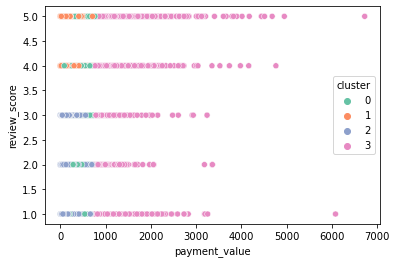

In [11]:
# Sélectionner les variables pertinentes pour la segmentation
X = df[['days_since_last_purchase', 'total_amount_client', 'review_score']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Appliquer l'algorithme de k-means sur les données normalisées
kmeans.fit(X_scaled)

# Ajouter la colonne de labels de clusters au dataframe
df['cluster'] = kmeans.labels_

# Afficher un graphique de dispersion avec les couleurs des clusters
sns.scatterplot(data=df, x='payment_value', y='review_score', hue='cluster', palette='Set2')
plt.show()

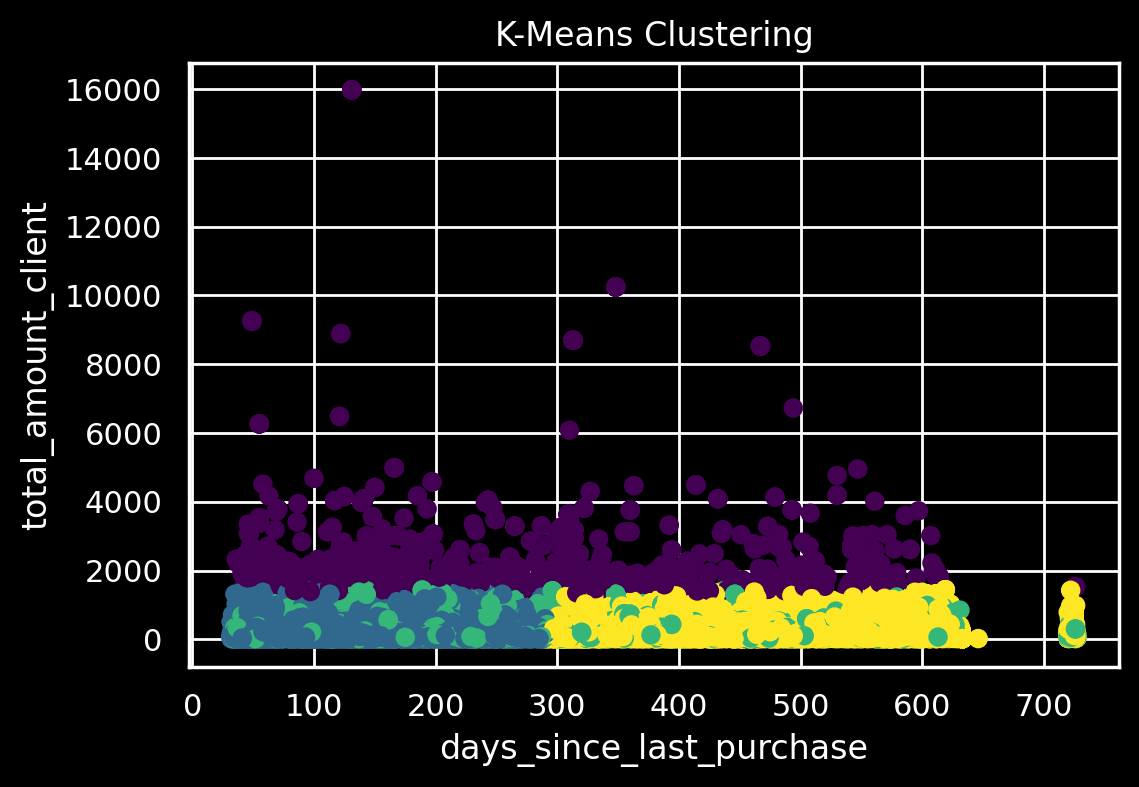

In [36]:
# Sélectionner les variables pertinentes pour la segmentation
X = df[['days_since_last_purchase', 'total_amount_client', 'review_score']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Appliquer l'algorithme de k-means sur les données normalisées
kmeans.fit(X_scaled)

# Ajouter la colonne de labels de clusters au dataframe
df['cluster'] = kmeans.labels_

# Afficher un graphique de dispersion avec les couleurs des clusters
plt.scatter(df['days_since_last_purchase'], df['total_amount_client'], c=df['cluster'], cmap='viridis')
plt.xlabel('days_since_last_purchase')
plt.ylabel('total_amount_client')
plt.title('K-Means Clustering')
plt.show()

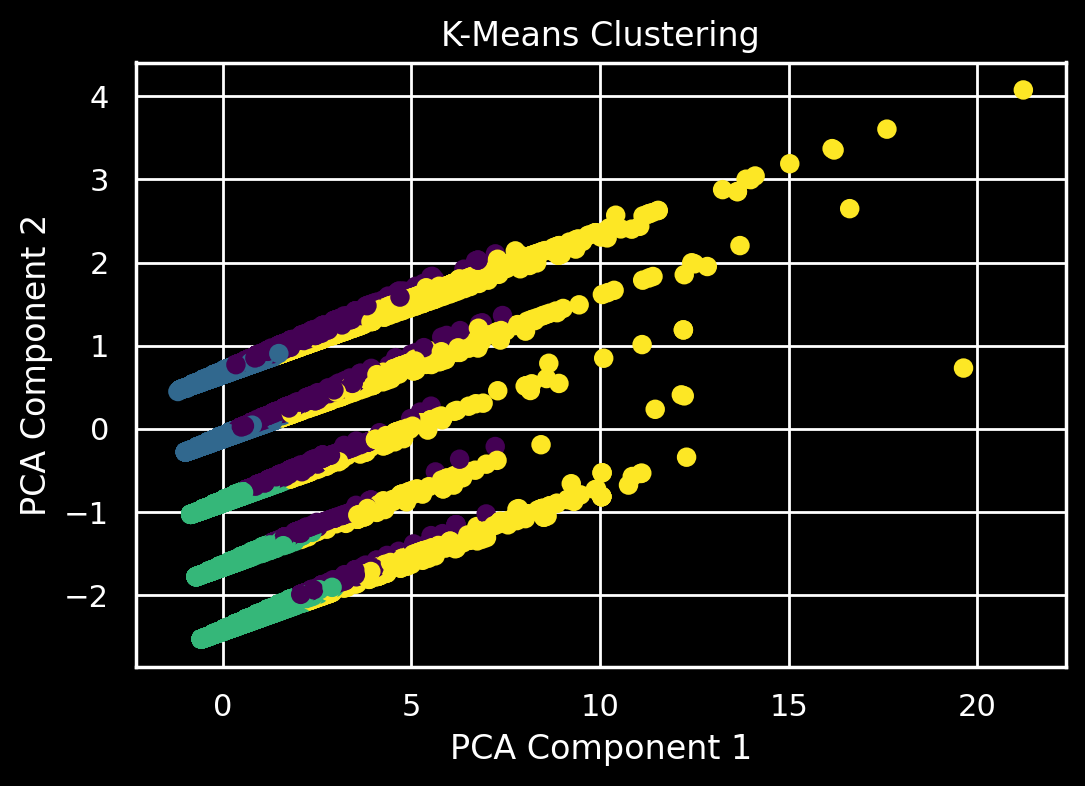

In [22]:
# Sélectionner les variables pertinentes pour la segmentation
X = df[['payment_value', 'payment_installments', 'review_score']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduire la dimensionnalité des données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Définir le nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Appliquer l'algorithme de k-means sur les données normalisées
kmeans.fit(X_scaled)

# Ajouter la colonne de labels de clusters au dataframe
df['cluster'] = kmeans.labels_

# Afficher un graphique de dispersion avec les couleurs des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

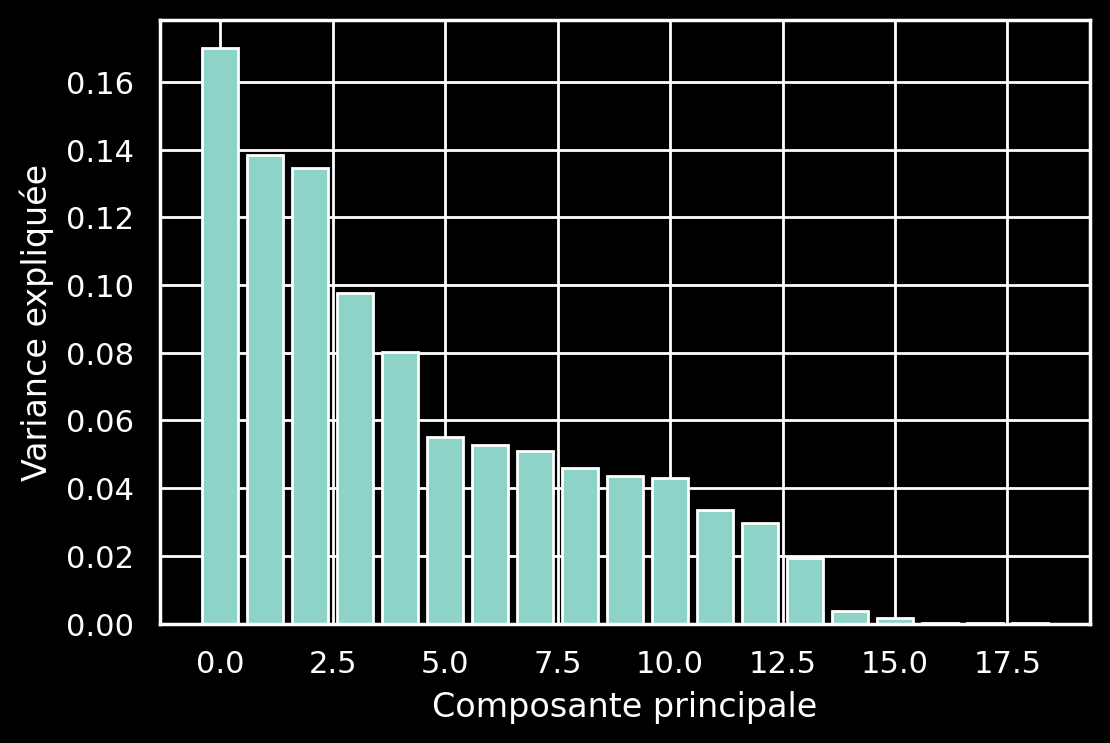

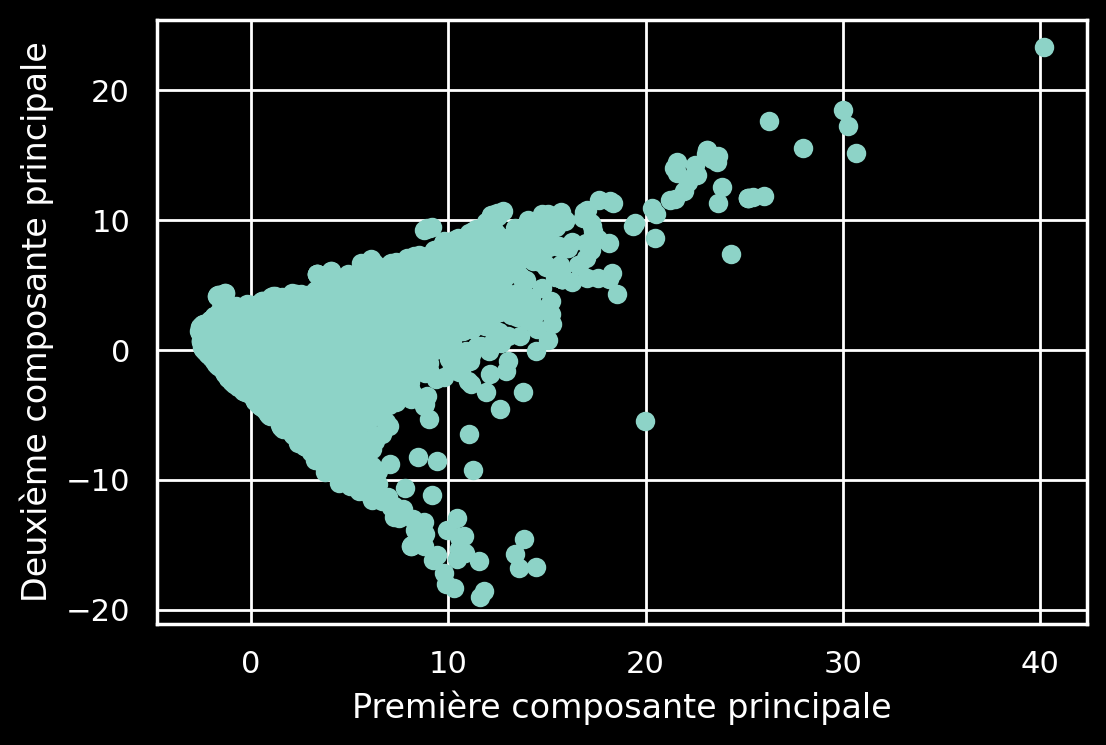

findfont: Font family ['Optima'] not found. Falling back to DejaVu Sans.


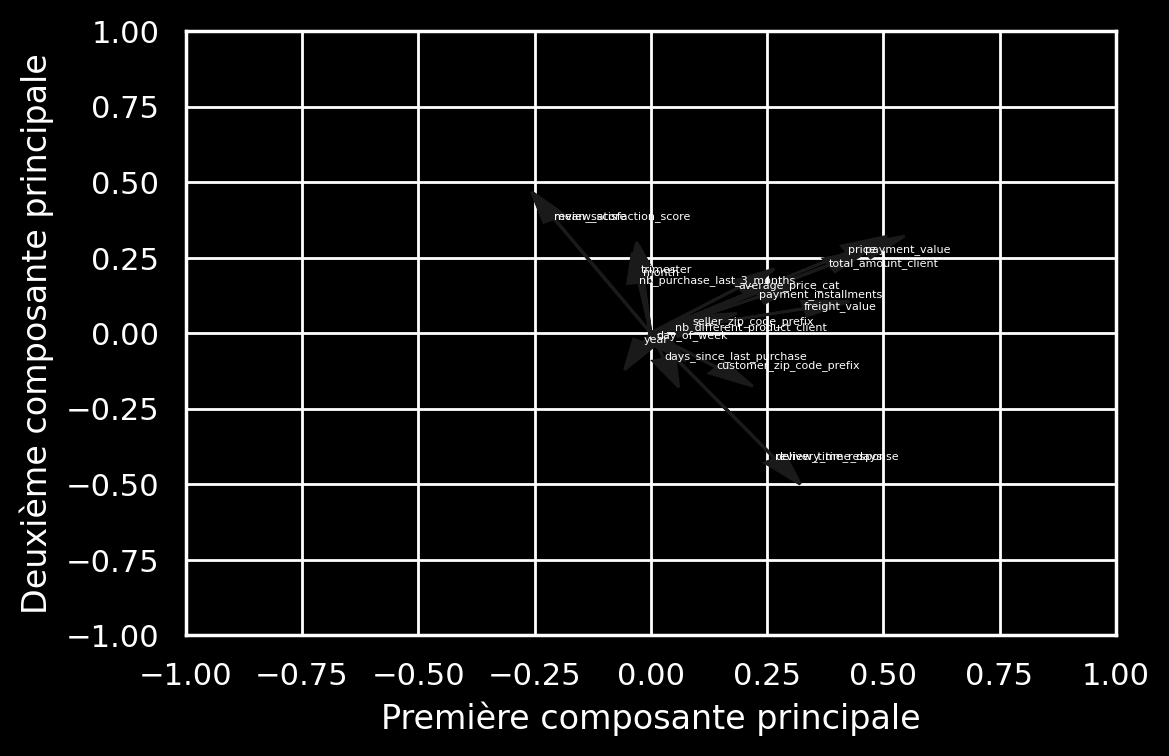

In [40]:
# Suppression des colonnes non numériques (si nécessaire)
df = df.select_dtypes(include=[np.number])

# Standardisation des données
df_standard = (df - df.mean()) / df.std()

# Création de l'objet PCA et calcul des composantes principales
pca = PCA()
pca.fit(df_standard)

# Affichage de la variance expliquée par chaque composante
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.show()

# Projection des données sur les deux premières composantes principales
pca_projection = pca.transform(df_standard)[:, :2]

# Affichage de la représentation graphique des individus
plt.scatter(pca_projection[:, 0], pca_projection[:, 1])
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()

# Affichage du cercle des corrélations
fig, ax = plt.subplots()
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.annotate(df.columns[i], (x, y), fontsize=4)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()